<a href="https://colab.research.google.com/github/Deepika441/CV/blob/main/Shape_Detection_using_Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

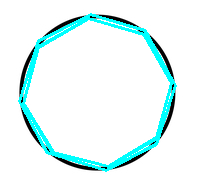

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def detect_shapes(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Failed to load image from {image_path}.")
        return
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Blur to reduce noise
    gray_blurred = cv2.medianBlur(gray, 5)
    # Edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    # Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    # Hough Circle Transform
    circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20,
                                param1=50, param2=30, minRadius=1, maxRadius=40)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)
    # Contour Detection for Other Shapes
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        # Approximate the contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        # Draw the contours for different shapes
        if len(approx) == 3:
            # Triangle
            cv2.drawContours(image, [approx], 0, (0, 255, 255), 2)
        elif len(approx) == 4:
            # Rectangle or Square
            cv2.drawContours(image, [approx], 0, (255, 0, 0), 2)
        elif len(approx) > 4:
            # Circle or Ellipse
            area = cv2.contourArea(contour)
            if area > 100:
                cv2.drawContours(image, [approx], 0, (255, 255, 0), 2)
    # Display the result
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
# Example usage
detect_shapes("circle.jpg")

